In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import random
warnings.filterwarnings("ignore")
 
def generate(case):
    if(case == 0):
        normal_samples= 1000
        outliers      = 0
        errors        = np.random.normal(0,1, normal_samples+outliers)
    
    elif(case == 1):
        normal_samples= 900
        outliers      = 100
        errors        = np.random.normal(0,1, normal_samples+outliers)
        out           = random.sample(range(1,normal_samples+outliers),outliers) #outliers position
        rand          = 100000#outliers distance
        errors[out]   += rand
        
    elif(case == 2):
        normal_samples= 800
        outliers      = 200
        errors        = np.random.normal(0,1, normal_samples+outliers)
        out           = random.sample(range(1,normal_samples+outliers),outliers) #outliers position
        rand          = random.sample(range(100,100000),outliers)#outliers distance
        errors[out]   += rand
        
    elif(case == 3):
        normal_samples= 700
        outliers      = 300
        errors        = np.random.normal(0,1, normal_samples+outliers)
        out           = random.sample(range(1,normal_samples+outliers),outliers) #outliers position
        rand          = random.sample(range(100,100000),outliers)+np.random.standard_t(2, outliers)#outliers distance
        errors[out]   += 10**10
    random.shuffle(errors)
    return errors

def calculate_IcdIc(p,lamb,sigma,dp):
    if 1-lamb + p > 0:
        Ic = (1-math.exp((1-lamb+p)**2/(-2*sigma*sigma))) / (1-math.exp(1/(-2*sigma*sigma)))
        dIc= ( (math.exp((1-lamb+p)**2/(-2*sigma*sigma))) / (1-math.exp(1/(-2*sigma*sigma))))\
            * ((1 - lamb + p) /(sigma*sigma)) * dp
    else:
        Ic = 0
        dIc= 0
    return Ic,dIc

def calculate_pdp(e,errors,h):
    n     = len(errors)
    p     = 0
    dp    = 0  
    for i in range(n):
        p += math.exp((e-errors[i])**2 / (-2*h*h)) / (n*h)
        dp+= (math.exp((e-errors[i])**2 / (-2*h*h)) / (n*h) ) * ((errors[i]-e) / (h*h))
    return p,dp

def draw(sigma,h,Lamb):
    sensitive = []
    for e in np.arange(0,10,0.1):
        p,dp   = calculate_pdp(e, errors,h)
        Ic,dIc = calculate_IcdIc(p, Lamb, sigma, dp)
        sensitive.append(2*e*Ic + e*e*dIc)
        p,dp,Ic,dIc=0,0,0,0
    X = np.arange(0,10,0.1)
    y = sensitive
    return X,y

def draw1(sigma,h,Lamb):
    sensitive = []
    for e in np.arange(0,10,0.1):
        p,dp   = calculate_pdp(e, errors,h)
        Ic,dIc = calculate_IcdIc(p, Lamb, sigma, dp)
        sensitive.append(Ic)
        p,dp,Ic,dIc=0,0,0,0
    X = np.arange(0,10,0.1)
    y = sensitive
    return X,y

def draw2(sigma,h,Lamb):
    sensitive = []
    for e in np.arange(0,10,0.1):
        p,dp   = calculate_pdp(e, errors,h)
        Ic,dIc = calculate_IcdIc(p, Lamb, sigma, dp)
        sensitive.append(dIc)
        p,dp,Ic,dIc=0,0,0,0
    X = np.arange(0,10,0.1)
    y = sensitive
    return X,y


# Error Data Generation

## 0/1/2/3 data types are different "noise + outlier" cases. 

### Firstly, we depart the errors into normal ones with $e \in \mathcal{N}(0,1)$ and outliers with large random noise. Here, the atypical errors include Type $A$ ($e$ is a large fixed value $10^{5}$), Type $B$ ($e$ is an arbitrary value in $\left.\left(10^{2}, 10^{5}\right)\right)$, and Type $C$ ($e=e_{1}+e_{2}$, where student noise $e_{1} \in t(2)$ and $e_{2}$ is an arbitrary value in $\left.\left(10^{2}, 10^{5}\right)\right)$. 

### Error data are generated including: 

#### 1) 1000 normal errors; 

#### 2) 900 normal errors and 100 outliers of Type $A$; 

#### 3) 800 normal errors and 200 outliers of Type $B$; 

#### 4) 700 normal errors and 300 outliers of Type $C$. 

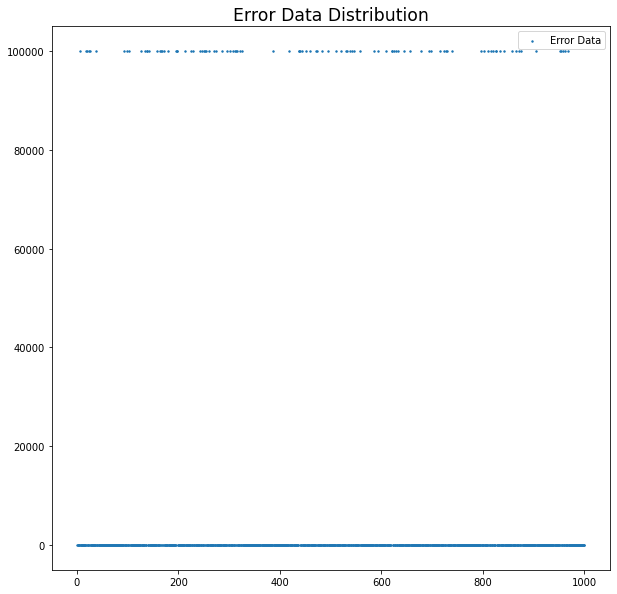

In [2]:
errors = generate(1)  # 1 2 3 4

X = np.arange(1,1001)
y = errors

plt.plot
plt.figure(figsize=(10, 10))
plt.title("Error Data Distribution",fontsize= 'xx-large') 
plt.scatter(X, y, s=2, label='Error Data')
plt.legend()
plt.show()

# 1.   Curve for $\frac{\partial e^{2} \phi\left(\lambda-\hat{p}_{E}(e)\right)}{\partial e}$

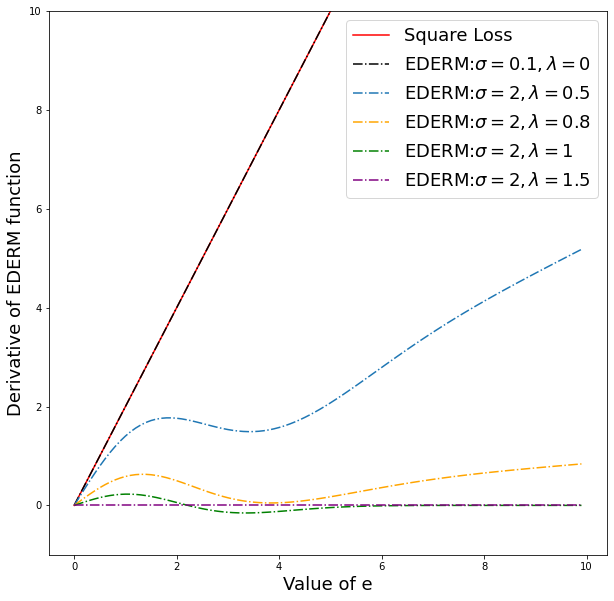

In [3]:
plt.figure(figsize=(10, 10))

# 0
plt.ylim(-1,10)
X = np.arange(0,10,0.1)
y = 2*X
plt.plot(X, y,c='red')

#1
X,y =  draw(sigma = 0.1,h = 2,Lamb = 0)
plt.plot(X, y,'-.',c='black')

#2
X,y =  draw(sigma = 2,h = 2,Lamb = 0.5)
plt.plot(X, y,'-.')

#3
X,y =  draw(sigma = 2,h = 2,Lamb = 0.8)
plt.plot(X, y,'-.',c='orange')

#4
X,y =  draw(sigma = 2,h = 2,Lamb = 1)
plt.plot(X, y,'-.',c='green')

#5
X,y =  draw(sigma = 2,h = 2,Lamb = 1.5)
plt.plot(X, y,'-.',c='purple')

plt.xlabel('Value of e', fontsize = 18)
plt.ylabel('Derivative of EDERM function', fontsize = 18)
plt.legend(['Square Loss',"EDERM:$\sigma = 0.1 , \lambda = 0$","EDERM:$\sigma = 2 , \lambda = 0.5$"
            ,"EDERM:$\sigma = 2 , \lambda = 0.8$","EDERM:$\sigma = 2 , \lambda = 1$",
            "EDERM:$\sigma = 2 , \lambda = 1.5$"],fontsize=18)
plt.show()

# 2.   Curve for $\phi(\lambda-$ $\left.\hat{p}_{E}(e)\right)$

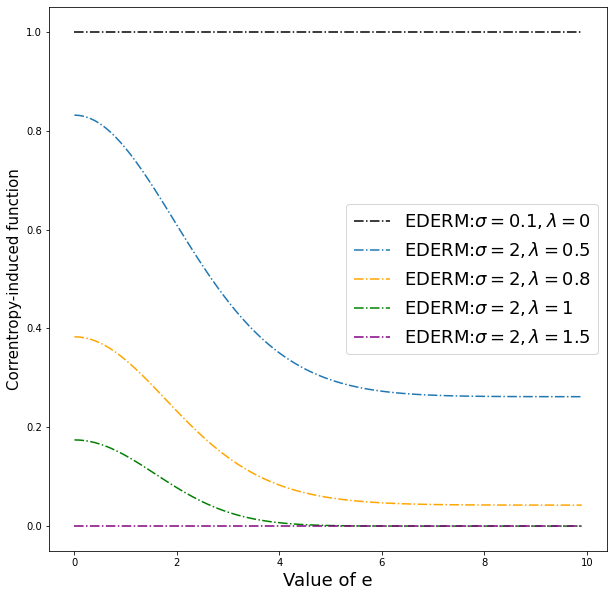

In [4]:
plt.figure(figsize=(10, 10))

#1
X,y =  draw1(sigma = 0.1,h = 2,Lamb = 0)
plt.plot(X, y,'-.',c='black')

#2
X,y =  draw1(sigma = 2,h = 2,Lamb = 0.5)
plt.plot(X, y,'-.')

#3
X,y =  draw1(sigma = 2,h = 2,Lamb = 0.8)
plt.plot(X, y,'-.',c='orange')

#4
X,y =  draw1(sigma = 2,h = 2,Lamb = 1)
plt.plot(X, y,'-.',c='green')

#5
X,y =  draw1(sigma = 2,h = 2,Lamb = 1.5)
plt.plot(X, y,'-.',c='purple')

plt.xlabel('Value of e', fontsize = 18)
plt.ylabel('Correntropy-induced function', fontsize = 15)
plt.legend(["EDERM:$\sigma = 0.1 , \lambda = 0$","EDERM:$\sigma = 2 , \lambda = 0.5$",
            "EDERM:$\sigma = 2 , \lambda = 0.8$","EDERM:$\sigma = 2 , \lambda = 1$",
            "EDERM:$\sigma = 2 , \lambda = 1.5$"],fontsize=18)
plt.show()

# 3.   Curve for $\frac{\partial \phi\left(\lambda-\hat{p}_{E}(e)\right)}{\partial e}$

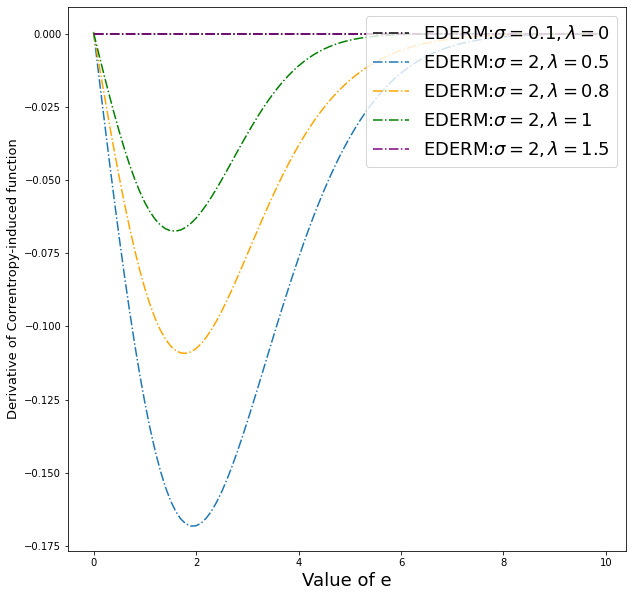

In [5]:
plt.figure(figsize=(10, 10))

#1
X,y =  draw2(sigma = 0.1,h = 2,Lamb = 0)
plt.plot(X, y,'-.',c='black')

#2
X,y =  draw2(sigma = 2,h = 2,Lamb = 0.5)
plt.plot(X, y,'-.')

#3
X,y =  draw2(sigma = 2,h = 2,Lamb = 0.8)
plt.plot(X, y,'-.',c='orange')

#4
X,y =  draw2(sigma = 2,h = 2,Lamb = 1)
plt.plot(X, y,'-.',c='green')


#5
X,y =  draw2(sigma = 2,h = 2,Lamb = 1.5)
plt.plot(X, y,'-.',c='purple')

plt.xlabel('Value of e', fontsize = 18)
plt.ylabel('Derivative of Correntropy-induced function', fontsize = 13)
plt.legend(["EDERM:$\sigma = 0.1 , \lambda = 0$","EDERM:$\sigma = 2 , \lambda = 0.5$",
            "EDERM:$\sigma = 2 , \lambda = 0.8$","EDERM:$\sigma = 2 , \lambda = 1$",
            "EDERM:$\sigma = 2 , \lambda = 1.5$"],loc=1,fontsize=18)
plt.show()

# 4.   Curve for $e^{2} \phi\left(\lambda-\hat{p}_{E}(e)\right)$

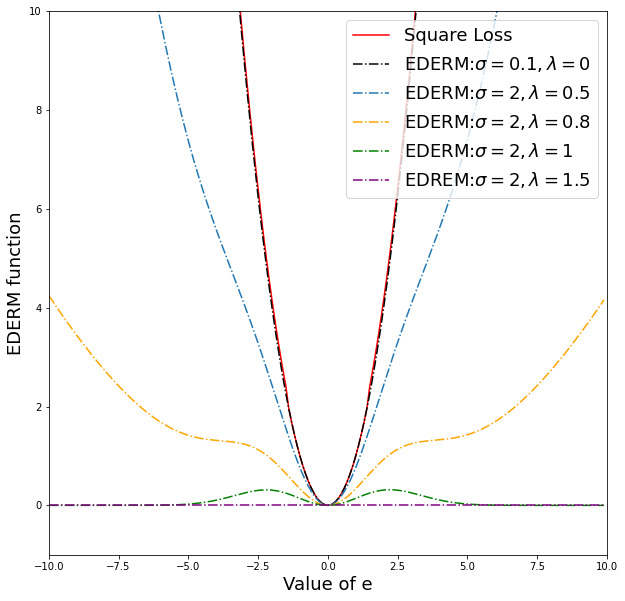

In [6]:
def draw(sigma,h,Lamb):
    sensitive = []
    for e in np.arange(-10,10,0.1):
        p,dp   = calculate_pdp(e, errors,h)
        Ic,dIc = calculate_IcdIc(p, Lamb, sigma, dp)
        sensitive.append(e*e*Ic)
        # sensitive.append(2*e*Ic + e*e*dIc)
        p,dp,Ic,dIc=0,0,0,0
    X = np.arange(-10,10,0.1)
    y = sensitive
    return X,y


plt.figure(figsize=(10, 10))
plt.xlim(-10,10)
plt.ylim(-1,10)

# 0
X = np.arange(-10,10,0.1)
y = X**2
for i in range(len(y)):
    if(y[i]>2 or y[i]<-2):
        y[i] = y[i]+0.15
plt.plot(X, y,c='red')

#1
X,y =  draw(sigma = 0.1,h = 2,Lamb = 0)
plt.plot(X, y,'-.',c='black')

#2
X,y =  draw(sigma = 2,h = 2,Lamb = 0.5)
plt.plot(X, y,'-.')

#3
X,y =  draw(sigma = 2,h = 2,Lamb = 0.8)
plt.plot(X, y,'-.',c='orange')

#4
X,y =  draw(sigma = 2,h = 2,Lamb = 1)
plt.plot(X, y,'-.',c='green')

#5
X,y =  draw(sigma = 2,h = 2,Lamb = 1.5)
plt.plot(X, y,'-.',c='purple')

plt.xlabel('Value of e', fontsize = 18)
plt.ylabel('EDERM function', fontsize = 18)
plt.legend(['Square Loss',"EDERM:$\sigma = 0.1 , \lambda = 0$","EDERM:$\sigma = 2 , \lambda = 0.5$"
            ,"EDERM:$\sigma = 2 , \lambda = 0.8$","EDERM:$\sigma = 2 , \lambda = 1$",
            "EDREM:$\sigma = 2 , \lambda = 1.5$"],fontsize=18,loc=1)
plt.show()